# Initial Experiments

Having performed EDA and data cleaning, the data is now ready for training and testing machine learning models.
The initial approach is to run some simple experiments with models using their default parameters and evaluate the model performances.
From there, a short list of promising models will be selected to move forward and tune hyperparemters.

## The Experiments

Domain knowledge tells us that the trip duration and distance is how the fare is actually calculated.
As a reminder, R and $\theta$ are the polar coordinate transformations of trip duration and trip distance.
The variable in this experiment will be the features used to train models.
There will be 3 sets of features used to see which give the best result, and if the best result is good enough.
The feature sets are:
1. Trip duration and trip distance
2. Trip duration, trip distance, R, and $\theta$
3. R and $\theta$

Out of curiosity, I would like to know if polar coordinate representation of the trip duration and distance would make any difference in the performance.

### Models to Use
Several tree based algorithms will be used
* LightGBM GBT
* XGBoost
* CatBoost
* Random Forest (Scikit-learn)
* Random Forest (LighGBM)
* Light GBM Dart

Linear models will also be used:
* Linear regression
* Lasso (uses LassoCV first)
* Ridge (uses RidgeCV first)
* Elastic Net (uses ElasticNetCV first)
* Huber Regression
* Stochastic Gradient Descent
* Linear SVR

Also, Sci-kit learn's implementation of mutli-layer perceptron will be used. The reason for using Sci-kit learn is that the API uses fit and predict, making it easy to integrate in an ensemble if needed.

### Feature Scaling
Tree based models will have no feature scaling.
Linear models will use the MinMax scaler on all features.


### Evaluating Models

The models are evaluated using cross validation and test data.
The R2-score, MAE, MAPE, and RMSE are all computed metrics.
Additionally, the following graphs are constructed to evaluate each model:
* Plots of residuals and raw errors, including scatter plots and histograms
* Learning curves
* Feature importances (where applicable)
* Statistical summaries of risudals and raw errors in the form of a table.

### Running Experiments

Experiments are run using files in `/code/models_init`, specifically `train_model.py` which is parameter driven using CLI arguments and argparse.
There is a script `generate_experiments.py` which generates a list of the CLI arguments to run all the experiments, and dumps the list into a text file called `experiments.txt`.
Then, run the shell script `execute_experiments.sh` to run all the experiments generated.


The file structures are organized in a modular way.
The file `train_model.py` handles the experiment, but leverages specific models in their respective files.
For example, the file `lgbm_base.py` trains and evaluates the LightGBM GBT model.
Additionally, there is a file `custom_funcs.py` which share common functions used across the model files and the `train_model.py` file.
To add more models to the experiment, a specific model file must be written and then `custom_funcs.py` must be updated to include that model so it may be parsed correctly and used when specifying the new model for an experiment.

## Results

In [77]:
import mlflow
from IPython.display import display
import pandas as pd
pd.set_option('display.max_rows', None)
from PIL import Image

In [103]:
mlflow.set_tracking_uri("http://localhost:5000")
client = mlflow.tracking.MlflowClient()

The name of the experiment used in MLFlow is `fare_amount_initial`

In [104]:
run_results = mlflow.search_runs(experiment_names=["fare_amount_initial"])

In [105]:
run_results.columns

Index(['run_id', 'experiment_id', 'status', 'artifact_uri', 'start_time',
       'end_time', 'metrics.test_r2', 'metrics.test_mape', 'metrics.cv_r2',
       'metrics.test_mae', 'metrics.test_rmse', 'metrics.cv_mape',
       'metrics.cv_rmse', 'metrics.cv_mae', 'params.n_testing_examples',
       'params.features', 'params.n_training_examples', 'params.scaler',
       'params.cv', 'params.weights', 'params.random_state', 'params.run_name',
       'params.model', 'params.best_coefs', 'params.best_alpha',
       'params.best_l1', 'tags.mlflow.source.name', 'tags.mlflow.user',
       'tags.mlflow.source.git.commit', 'tags.mlflow.runName',
       'tags.mlflow.source.type', 'tags.mlflow.log-model.history'],
      dtype='object')

### All Results

In [106]:
all_results = run_results[["params.model", "params.features", "metrics.cv_r2", "metrics.cv_rmse", "metrics.test_r2", "metrics.test_rmse", 'run_id']].sort_values(by="metrics.test_rmse")

In [107]:
display(all_results)

params.model                                    params.features  \
1         mlp_sklearn  ['trip_distance', 'trip_duration_min', 'r', 't...   
28               lgbm  ['trip_distance', 'trip_duration_min', 'r', 't...   
0         mlp_sklearn                                     ['r', 'theta']   
22           catboost  ['trip_distance', 'trip_duration_min', 'r', 't...   
29               lgbm             ['trip_distance', 'trip_duration_min']   
2         mlp_sklearn             ['trip_distance', 'trip_duration_min']   
23           catboost             ['trip_distance', 'trip_duration_min']   
19  linear_regression  ['trip_distance', 'trip_duration_min', 'r', 't...   
13              ridge  ['trip_distance', 'trip_duration_min', 'r', 't...   
4          linear_svr  ['trip_distance', 'trip_duration_min', 'r', 't...   
10              huber  ['trip_distance', 'trip_duration_min', 'r', 't...   
21           catboost                                     ['r', 'theta']   
27               lgbm                                     ['r', 'theta']   
25            xgboost  ['trip_distance', 'trip_duration_min', 'r', 't...   
26            xgboost             ['trip_distance', 'trip_duration_min']   
16              lasso  ['trip_distance', 'trip_duration_min', 'r', 't...   
24            xgboost                                     ['r', 'theta']   
7                 sgd  ['trip_distance', 'trip_duration_min', 'r', 't...   
14              ridge             ['trip_distance', 'trip_duration_min']   
20  linear_regression             ['trip_distance', 'trip_duration_min']   
17              lasso             ['trip_distance', 'trip_duration_min']   
8                 sgd             ['trip_distance', 'trip_duration_min']   
11              huber             ['trip_distance', 'trip_duration_min']   
5          linear_svr             ['trip_distance', 'trip_duration_min']   
31        elastic_net  ['trip_distance', 'trip_duration_min', 'r', 't...   
40         rf_sklearn  ['trip_distance', 'trip_duration_min', 'r', 't...   
41         rf_sklearn             ['trip_distance', 'trip_duration_min']   
32        elastic_net             ['trip_distance', 'trip_duration_min']   
37            rf_lgbm  ['trip_distance', 'trip_duration_min', 'r', 't...   
39         rf_sklearn                                     ['r', 'theta']   
38            rf_lgbm             ['trip_distance', 'trip_duration_min']   
34          dart_lgbm  ['trip_distance', 'trip_duration_min', 'r', 't...   
35          dart_lgbm             ['trip_distance', 'trip_duration_min']   
36            rf_lgbm                                     ['r', 'theta']   
33          dart_lgbm                                     ['r', 'theta']   
12              ridge                                     ['r', 'theta']   
18  linear_regression                                     ['r', 'theta']   
15              lasso                                     ['r', 'theta']   
6                 sgd                                     ['r', 'theta']   
30        elastic_net                                     ['r', 'theta']   
9               huber                                     ['r', 'theta']   
3          linear_svr                                     ['r', 'theta']   

    metrics.cv_r2  metrics.cv_rmse  metrics.test_r2  metrics.test_rmse  \
1        0.995592              NaN         0.995608           0.750087   
28       0.995575         0.752728         0.995586           0.752045   
0        0.995474              NaN         0.995498           0.759460   
22       0.985747         1.351007         0.995445           0.763947   
29       0.995342         0.772357         0.995369           0.770254   
2        0.995277              NaN         0.995304           0.775617   
23       0.985707         1.352910         0.995107           0.791759   
19       0.995082         0.793568         0.995100           0.792333   
13       0.995082         0.793625         0.995099           0.792376   


### Results for Trip Distance & Trip Duration

In [108]:
display(run_results[["params.model", "params.features", "metrics.cv_r2", "metrics.cv_rmse", "metrics.test_r2", "metrics.test_rmse"]].loc[run_results["params.features"] == "['trip_distance', 'trip_duration_min']"].sort_values(by="metrics.test_rmse"))

params.model                         params.features  metrics.cv_r2  \
29               lgbm  ['trip_distance', 'trip_duration_min']       0.995342   
2         mlp_sklearn  ['trip_distance', 'trip_duration_min']       0.995277   
23           catboost  ['trip_distance', 'trip_duration_min']       0.985707   
26            xgboost  ['trip_distance', 'trip_duration_min']       0.965663   
14              ridge  ['trip_distance', 'trip_duration_min']       0.992814   
20  linear_regression  ['trip_distance', 'trip_duration_min']       0.992814   
17              lasso  ['trip_distance', 'trip_duration_min']       0.992812   
8                 sgd  ['trip_distance', 'trip_duration_min']       0.992800   
11              huber  ['trip_distance', 'trip_duration_min']       0.992745   
5          linear_svr  ['trip_distance', 'trip_duration_min']       0.992705   
41         rf_sklearn  ['trip_distance', 'trip_duration_min']       0.989910   
32        elastic_net  ['trip_distance', 'trip_duration_min']       0.989761   
38            rf_lgbm  ['trip_distance', 'trip_duration_min']       0.982741   
35          dart_lgbm  ['trip_distance', 'trip_duration_min']       0.972970   

    metrics.cv_rmse  metrics.test_r2  metrics.test_rmse  
29         0.772357         0.995369           0.770254  
2               NaN         0.995304           0.775617  
23         1.352910         0.995107           0.791759  
26         2.096910         0.993952           0.880260  
14         0.959261         0.992841           0.957707  
20         0.959261         0.992841           0.957707  
17         0.959380         0.992839           0.957805  
8          0.960245         0.992829           0.958527  
11         0.963897         0.992774           0.962160  
5          0.966552         0.992735           0.964752  
41         1.136965         0.989910           1.136965  
32         1.145040         0.989802           1.143026  
38         1.486567         0.982504           1.497181  
35         1.860471         0.973003           1.859775

### Results for Trip Distance, Trip Duration, R, & $\theta$

In [109]:
display(run_results[["params.model", "params.features", "metrics.cv_r2", "metrics.cv_rmse", "metrics.test_r2", "metrics.test_rmse"]].loc[run_results["params.features"] == "['trip_distance', 'trip_duration_min', 'r', 'theta']"].sort_values(by="metrics.test_rmse"))

params.model                                    params.features  \
1         mlp_sklearn  ['trip_distance', 'trip_duration_min', 'r', 't...   
28               lgbm  ['trip_distance', 'trip_duration_min', 'r', 't...   
22           catboost  ['trip_distance', 'trip_duration_min', 'r', 't...   
19  linear_regression  ['trip_distance', 'trip_duration_min', 'r', 't...   
13              ridge  ['trip_distance', 'trip_duration_min', 'r', 't...   
4          linear_svr  ['trip_distance', 'trip_duration_min', 'r', 't...   
10              huber  ['trip_distance', 'trip_duration_min', 'r', 't...   
25            xgboost  ['trip_distance', 'trip_duration_min', 'r', 't...   
16              lasso  ['trip_distance', 'trip_duration_min', 'r', 't...   
7                 sgd  ['trip_distance', 'trip_duration_min', 'r', 't...   
31        elastic_net  ['trip_distance', 'trip_duration_min', 'r', 't...   
40         rf_sklearn  ['trip_distance', 'trip_duration_min', 'r', 't...   
37            rf_lgbm  ['trip_distance', 'trip_duration_min', 'r', 't...   
34          dart_lgbm  ['trip_distance', 'trip_duration_min', 'r', 't...   

    metrics.cv_r2  metrics.cv_rmse  metrics.test_r2  metrics.test_rmse  
1        0.995592              NaN         0.995608           0.750087  
28       0.995575         0.752728         0.995586           0.752045  
22       0.985747         1.351007         0.995445           0.763947  
19       0.995082         0.793568         0.995100           0.792333  
13       0.995082         0.793625         0.995099           0.792376  
4        0.995023         0.798309         0.995064           0.795248  
10       0.995037         0.797231         0.995056           0.795902  
25       0.965804         2.092621         0.994195           0.862389  
16       0.993335         0.923882         0.993359           0.922411  
7        0.993086         0.940956         0.993117           0.939042  
31       0.990686         1.092106         0.990720           1.090377  
40       0.990054         1.128804         0.990054           1.128804  
37       0.983065         1.472636         0.982986           1.476411  
34       0.973107         1.855749         0.973147           1.854815

### Results for R & $\theta$

In [110]:
display(run_results[["params.model", "params.features", "metrics.cv_r2", "metrics.cv_rmse", "metrics.test_r2", "metrics.test_rmse"]].loc[run_results["params.features"] == "['r', 'theta']"].sort_values(by="metrics.test_rmse"))

params.model params.features  metrics.cv_r2  metrics.cv_rmse  \
0         mlp_sklearn  ['r', 'theta']       0.995474              NaN   
21           catboost  ['r', 'theta']       0.983726         1.443593   
27               lgbm  ['r', 'theta']       0.994664         0.826646   
24            xgboost  ['r', 'theta']       0.963644         2.157697   
39         rf_sklearn  ['r', 'theta']       0.982656         1.490642   
36            rf_lgbm  ['r', 'theta']       0.972032         1.892424   
33          dart_lgbm  ['r', 'theta']       0.971778         1.901071   
12              ridge  ['r', 'theta']       0.962825         2.181868   
18  linear_regression  ['r', 'theta']       0.962825         2.181868   
15              lasso  ['r', 'theta']       0.962823         2.181911   
6                 sgd  ['r', 'theta']       0.962764         2.183654   
30        elastic_net  ['r', 'theta']       0.956643         2.356304   
9               huber  ['r', 'theta']       0.956068         2.371876   
3          linear_svr  ['r', 'theta']       0.951615         2.489179   

    metrics.test_r2  metrics.test_rmse  
0          0.995498           0.759460  
21         0.994692           0.824629  
27         0.994685           0.825165  
24         0.993214           0.932430  
39         0.982656           1.490642  
36         0.972558           1.875043  
33         0.971815           1.900269  
12         0.962794           2.183289  
18         0.962794           2.183289  
15         0.962793           2.183316  
6          0.962738           2.184914  
30         0.956628           2.357265  
9          0.956098           2.371626  
3          0.951714           2.487218

### Results by Model

In [111]:
grouped_results = run_results[["params.model", "params.features", "metrics.cv_r2", "metrics.cv_rmse", "metrics.test_r2", "metrics.test_rmse"]].sort_values(by="metrics.test_rmse").groupby("params.model")

In [112]:
for model, group in grouped_results:
    print(f"Model: {model}")
    display(group)
    print()

Model: catboost


params.model                                    params.features  \
22     catboost  ['trip_distance', 'trip_duration_min', 'r', 't...   
23     catboost             ['trip_distance', 'trip_duration_min']   
21     catboost                                     ['r', 'theta']   

    metrics.cv_r2  metrics.cv_rmse  metrics.test_r2  metrics.test_rmse  
22       0.985747         1.351007         0.995445           0.763947  
23       0.985707         1.352910         0.995107           0.791759  
21       0.983726         1.443593         0.994692           0.824629


Model: dart_lgbm


params.model                                    params.features  \
34    dart_lgbm  ['trip_distance', 'trip_duration_min', 'r', 't...   
35    dart_lgbm             ['trip_distance', 'trip_duration_min']   
33    dart_lgbm                                     ['r', 'theta']   

    metrics.cv_r2  metrics.cv_rmse  metrics.test_r2  metrics.test_rmse  
34       0.973107         1.855749         0.973147           1.854815  
35       0.972970         1.860471         0.973003           1.859775  
33       0.971778         1.901071         0.971815           1.900269


Model: elastic_net


params.model                                    params.features  \
31  elastic_net  ['trip_distance', 'trip_duration_min', 'r', 't...   
32  elastic_net             ['trip_distance', 'trip_duration_min']   
30  elastic_net                                     ['r', 'theta']   

    metrics.cv_r2  metrics.cv_rmse  metrics.test_r2  metrics.test_rmse  
31       0.990686         1.092106         0.990720           1.090377  
32       0.989761         1.145040         0.989802           1.143026  
30       0.956643         2.356304         0.956628           2.357265


Model: huber


params.model                                    params.features  \
10        huber  ['trip_distance', 'trip_duration_min', 'r', 't...   
11        huber             ['trip_distance', 'trip_duration_min']   
9         huber                                     ['r', 'theta']   

    metrics.cv_r2  metrics.cv_rmse  metrics.test_r2  metrics.test_rmse  
10       0.995037         0.797231         0.995056           0.795902  
11       0.992745         0.963897         0.992774           0.962160  
9        0.956068         2.371876         0.956098           2.371626


Model: lasso


params.model                                    params.features  \
16        lasso  ['trip_distance', 'trip_duration_min', 'r', 't...   
17        lasso             ['trip_distance', 'trip_duration_min']   
15        lasso                                     ['r', 'theta']   

    metrics.cv_r2  metrics.cv_rmse  metrics.test_r2  metrics.test_rmse  
16       0.993335         0.923882         0.993359           0.922411  
17       0.992812         0.959380         0.992839           0.957805  
15       0.962823         2.181911         0.962793           2.183316


Model: lgbm


params.model                                    params.features  \
28         lgbm  ['trip_distance', 'trip_duration_min', 'r', 't...   
29         lgbm             ['trip_distance', 'trip_duration_min']   
27         lgbm                                     ['r', 'theta']   

    metrics.cv_r2  metrics.cv_rmse  metrics.test_r2  metrics.test_rmse  
28       0.995575         0.752728         0.995586           0.752045  
29       0.995342         0.772357         0.995369           0.770254  
27       0.994664         0.826646         0.994685           0.825165


Model: linear_regression


params.model                                    params.features  \
19  linear_regression  ['trip_distance', 'trip_duration_min', 'r', 't...   
20  linear_regression             ['trip_distance', 'trip_duration_min']   
18  linear_regression                                     ['r', 'theta']   

    metrics.cv_r2  metrics.cv_rmse  metrics.test_r2  metrics.test_rmse  
19       0.995082         0.793568         0.995100           0.792333  
20       0.992814         0.959261         0.992841           0.957707  
18       0.962825         2.181868         0.962794           2.183289


Model: linear_svr


params.model                                    params.features  \
4   linear_svr  ['trip_distance', 'trip_duration_min', 'r', 't...   
5   linear_svr             ['trip_distance', 'trip_duration_min']   
3   linear_svr                                     ['r', 'theta']   

   metrics.cv_r2  metrics.cv_rmse  metrics.test_r2  metrics.test_rmse  
4       0.995023         0.798309         0.995064           0.795248  
5       0.992705         0.966552         0.992735           0.964752  
3       0.951615         2.489179         0.951714           2.487218


Model: mlp_sklearn


params.model                                    params.features  \
1  mlp_sklearn  ['trip_distance', 'trip_duration_min', 'r', 't...   
0  mlp_sklearn                                     ['r', 'theta']   
2  mlp_sklearn             ['trip_distance', 'trip_duration_min']   

   metrics.cv_r2  metrics.cv_rmse  metrics.test_r2  metrics.test_rmse  
1       0.995592              NaN         0.995608           0.750087  
0       0.995474              NaN         0.995498           0.759460  
2       0.995277              NaN         0.995304           0.775617


Model: rf_lgbm


params.model                                    params.features  \
37      rf_lgbm  ['trip_distance', 'trip_duration_min', 'r', 't...   
38      rf_lgbm             ['trip_distance', 'trip_duration_min']   
36      rf_lgbm                                     ['r', 'theta']   

    metrics.cv_r2  metrics.cv_rmse  metrics.test_r2  metrics.test_rmse  
37       0.983065         1.472636         0.982986           1.476411  
38       0.982741         1.486567         0.982504           1.497181  
36       0.972032         1.892424         0.972558           1.875043


Model: rf_sklearn


params.model                                    params.features  \
40   rf_sklearn  ['trip_distance', 'trip_duration_min', 'r', 't...   
41   rf_sklearn             ['trip_distance', 'trip_duration_min']   
39   rf_sklearn                                     ['r', 'theta']   

    metrics.cv_r2  metrics.cv_rmse  metrics.test_r2  metrics.test_rmse  
40       0.990054         1.128804         0.990054           1.128804  
41       0.989910         1.136965         0.989910           1.136965  
39       0.982656         1.490642         0.982656           1.490642


Model: ridge


params.model                                    params.features  \
13        ridge  ['trip_distance', 'trip_duration_min', 'r', 't...   
14        ridge             ['trip_distance', 'trip_duration_min']   
12        ridge                                     ['r', 'theta']   

    metrics.cv_r2  metrics.cv_rmse  metrics.test_r2  metrics.test_rmse  
13       0.995082         0.793625         0.995099           0.792376  
14       0.992814         0.959261         0.992841           0.957707  
12       0.962825         2.181868         0.962794           2.183289


Model: sgd


params.model                                    params.features  \
7          sgd  ['trip_distance', 'trip_duration_min', 'r', 't...   
8          sgd             ['trip_distance', 'trip_duration_min']   
6          sgd                                     ['r', 'theta']   

   metrics.cv_r2  metrics.cv_rmse  metrics.test_r2  metrics.test_rmse  
7       0.993086         0.940956         0.993117           0.939042  
8       0.992800         0.960245         0.992829           0.958527  
6       0.962764         2.183654         0.962738           2.184914


Model: xgboost


params.model                                    params.features  \
25      xgboost  ['trip_distance', 'trip_duration_min', 'r', 't...   
26      xgboost             ['trip_distance', 'trip_duration_min']   
24      xgboost                                     ['r', 'theta']   

    metrics.cv_r2  metrics.cv_rmse  metrics.test_r2  metrics.test_rmse  
25       0.965804         2.092621         0.994195           0.862389  
26       0.965663         2.096910         0.993952           0.880260  
24       0.963644         2.157697         0.993214           0.932430

### Best Results for All Runs

In [113]:
best_idx_all = all_results.groupby("params.model")["metrics.test_rmse"].idxmin()
best_results = all_results.loc[best_idx_all].sort_values(by="metrics.test_rmse").reset_index(drop=True)

In [114]:
best_results

params.model                                    params.features  \
0         mlp_sklearn  ['trip_distance', 'trip_duration_min', 'r', 't...   
1                lgbm  ['trip_distance', 'trip_duration_min', 'r', 't...   
2            catboost  ['trip_distance', 'trip_duration_min', 'r', 't...   
3   linear_regression  ['trip_distance', 'trip_duration_min', 'r', 't...   
4               ridge  ['trip_distance', 'trip_duration_min', 'r', 't...   
5          linear_svr  ['trip_distance', 'trip_duration_min', 'r', 't...   
6               huber  ['trip_distance', 'trip_duration_min', 'r', 't...   
7             xgboost  ['trip_distance', 'trip_duration_min', 'r', 't...   
8               lasso  ['trip_distance', 'trip_duration_min', 'r', 't...   
9                 sgd  ['trip_distance', 'trip_duration_min', 'r', 't...   
10        elastic_net  ['trip_distance', 'trip_duration_min', 'r', 't...   
11         rf_sklearn  ['trip_distance', 'trip_duration_min', 'r', 't...   
12            rf_lgbm  ['trip_distance', 'trip_duration_min', 'r', 't...   
13          dart_lgbm  ['trip_distance', 'trip_duration_min', 'r', 't...   

    metrics.cv_r2  metrics.cv_rmse  metrics.test_r2  metrics.test_rmse  \
0        0.995592              NaN         0.995608           0.750087   
1        0.995575         0.752728         0.995586           0.752045   
2        0.985747         1.351007         0.995445           0.763947   
3        0.995082         0.793568         0.995100           0.792333   
4        0.995082         0.793625         0.995099           0.792376   
5        0.995023         0.798309         0.995064           0.795248   
6        0.995037         0.797231         0.995056           0.795902   
7        0.965804         2.092621         0.994195           0.862389   
8        0.993335         0.923882         0.993359           0.922411   
9        0.993086         0.940956         0.993117           0.939042   
10       0.990686         1.092106         0.990720           1.090377   
11       0.990054         1.128804         0.990054           1.128804   
12       0.983065         1.472636         0.982986           1.476411   
13       0.973107         1.855749         0.973147           1.854815   

                              run_id  
0   dbfaa1ba2dbc41cfa20b430be4855fb2  
1   17f685c92fb045eb93b9a97f57c428da  
2   ad2482ad78a24dce9560d4fabd52cdad  
3   ded14fe3456d46108c64719de2f0f4dc  
4   25e98e285e804752bbb6c0dc497f8813  
5   ab7a8bcc09ae4d898b1c3e19e35c2560  
6   42efd46e48d14878862091a084260f65  
7   3d777349da6649f69165430d91a5b0b4  
8   f7cf3f956dbc46969e4bb78889d1e65c  
9   738cd32d1fa34b98a84853718ba93dff  
10  9d37413b0cbd428ca9359b859a3d505b  
11  1ff6647c383c4e108b668b3239ad934a  
12  68dd0998cd374c04a16e32b0a23b6d8c  
13  b08429a52f8243158b99420f169cd3a2

## Artifacts

In [115]:
run_ids = best_results["run_id"].to_list()

In [116]:
def show_artifacts(run_id, client):
    run = client.get_run(run_id)
    base_artifact_path = run.info.artifact_uri
    artifacts_list = mlflow.artifacts.list_artifacts(base_artifact_path)
    for artifact in artifacts_list:
        if artifact.is_dir:
            continue
        if "learning_curve_l1" in artifact.path \
            or "learning_curve_mape" in artifact.path \
            or "learning_curve_mae" in artifact.path \
            or "errors_box" in artifact.path \
            or "residual_distribution" in artifact.path \
            or "errors_distance" in artifact.path \
            or "errors_r_vs" in artifact.path :
            continue
        artifact_uri = f"{base_artifact_path}/{artifact.path.split("/")[1]}"
        img = mlflow.artifacts.load_image(artifact_uri=artifact_uri)
        img.show()

In [66]:
artifacts_list

[<FileInfo: file_size=49652, is_dir=False, path='artifacts/lgbm_initial_stock_error_descriptive_stats.png'>,
 <FileInfo: file_size=47401, is_dir=False, path='artifacts/lgbm_initial_stock_error_distribution.png'>,
 <FileInfo: file_size=83434, is_dir=False, path='artifacts/lgbm_initial_stock_errors.png'>,
 <FileInfo: file_size=34350, is_dir=False, path='artifacts/lgbm_initial_stock_errors_box.png'>,
 <FileInfo: file_size=34087, is_dir=False, path='artifacts/lgbm_initial_stock_errors_boxen.png'>,
 <FileInfo: file_size=750386, is_dir=False, path='artifacts/lgbm_initial_stock_errors_distance_vs_duration.png'>,
 <FileInfo: file_size=636162, is_dir=False, path='artifacts/lgbm_initial_stock_errors_r_vs_theta.png'>,
 <FileInfo: file_size=20629, is_dir=False, path='artifacts/lgbm_initial_stock_feature_importances.png'>,
 <FileInfo: file_size=43290, is_dir=False, path='artifacts/lgbm_initial_stock_learning_curve_l1.png'>,
 <FileInfo: file_size=50804, is_dir=False, path='artifacts/lgbm_initial_sto

### LightGBM Artifacts

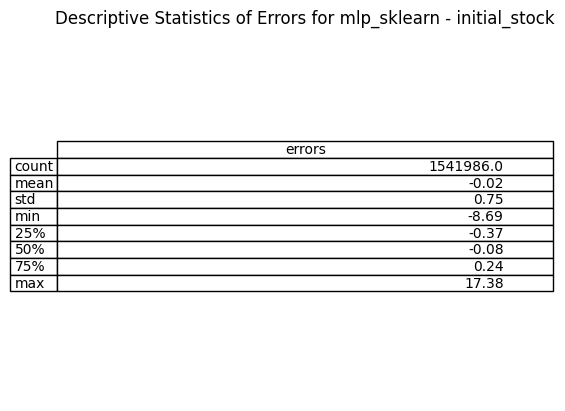

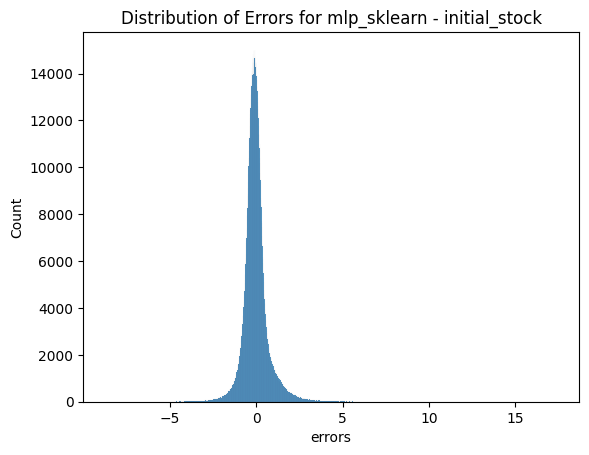

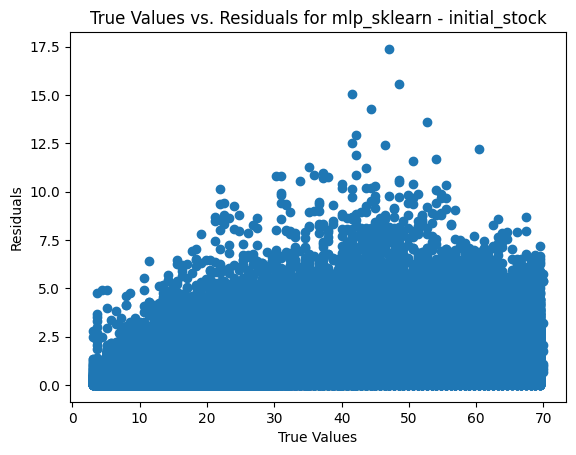

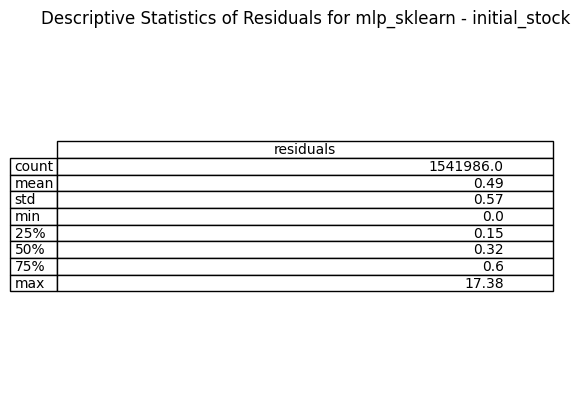

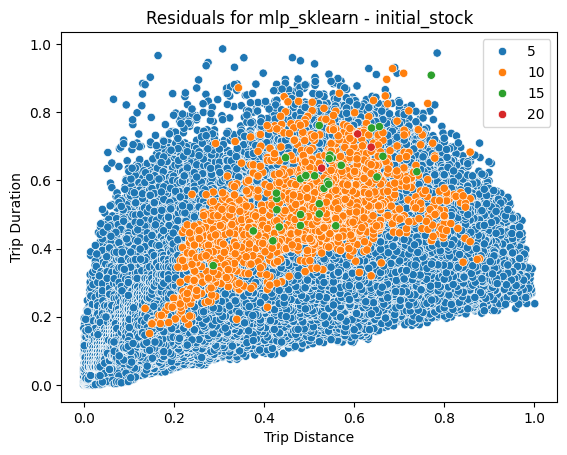

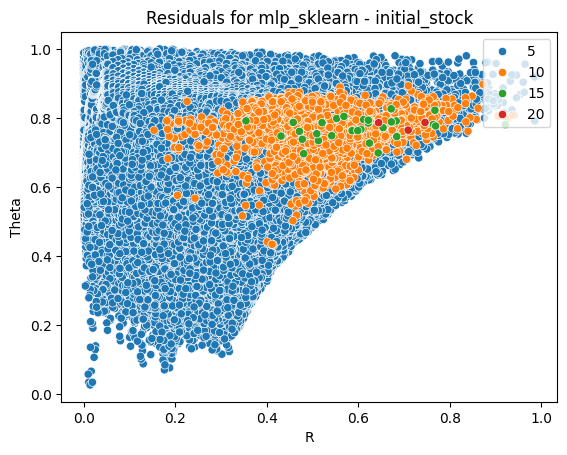

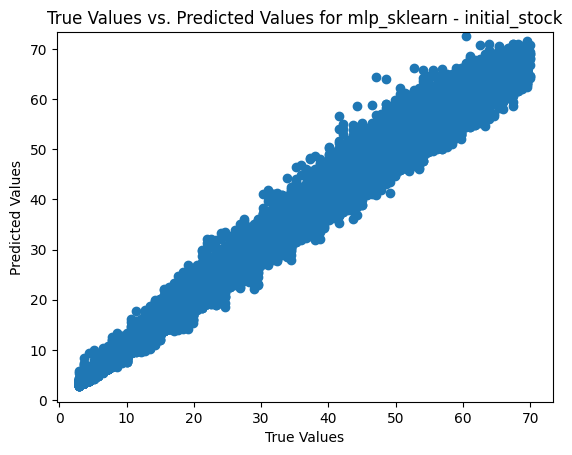

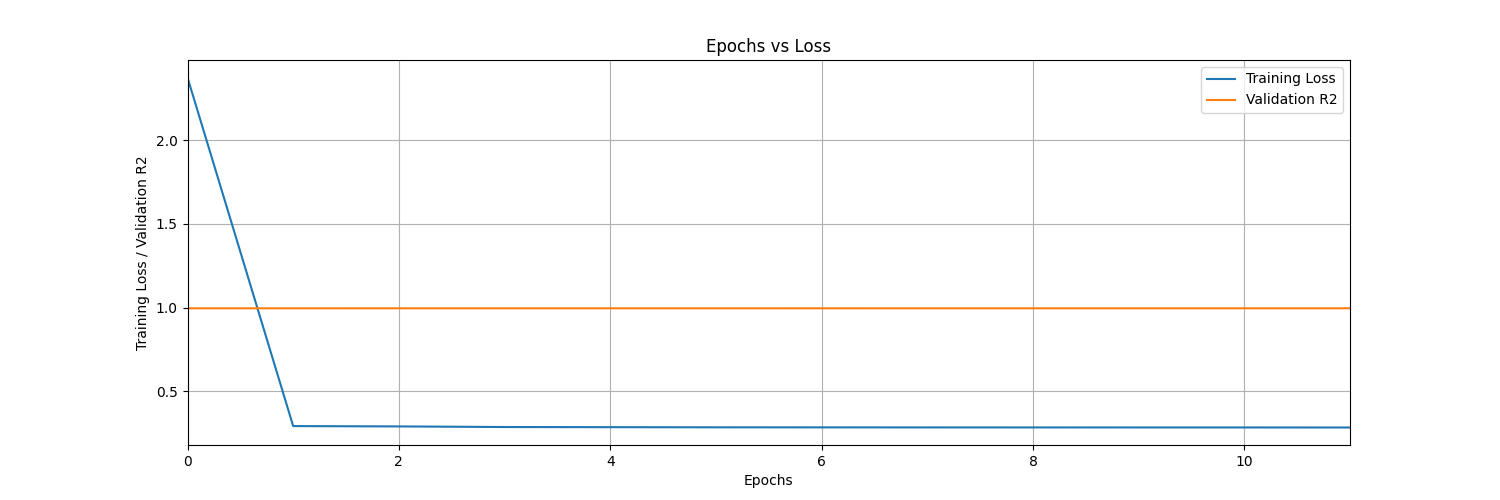

In [117]:
show_artifacts(run_ids[0], client)

### MLP Artifacts

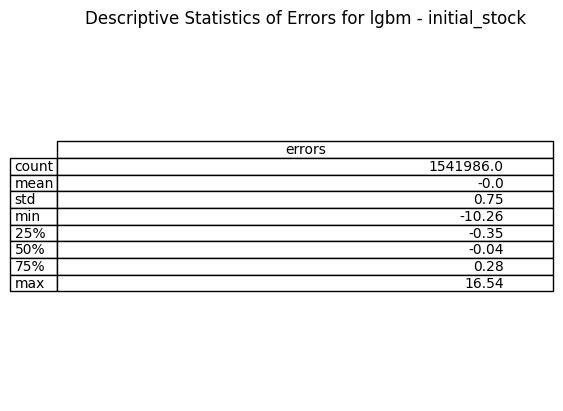

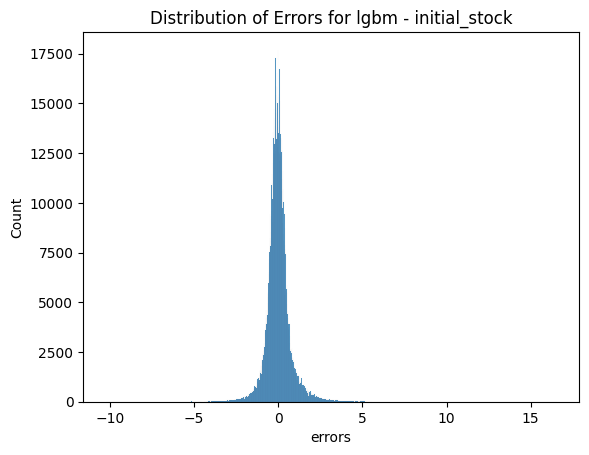

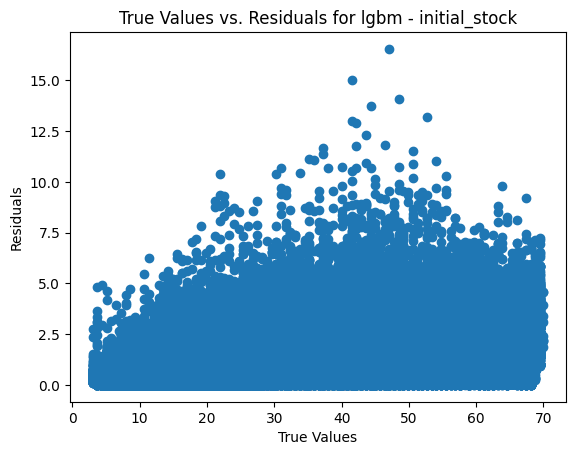

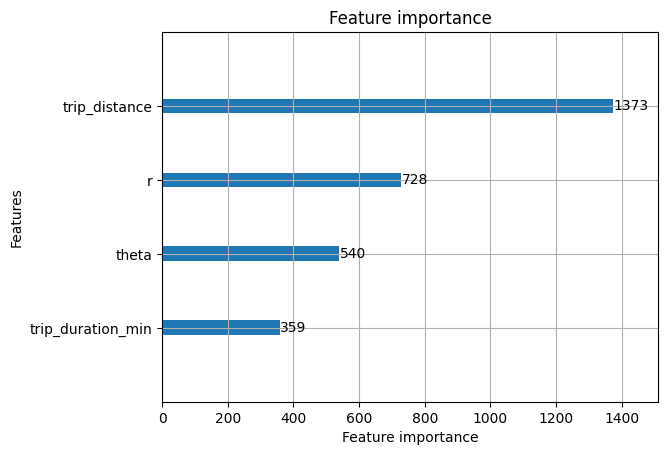

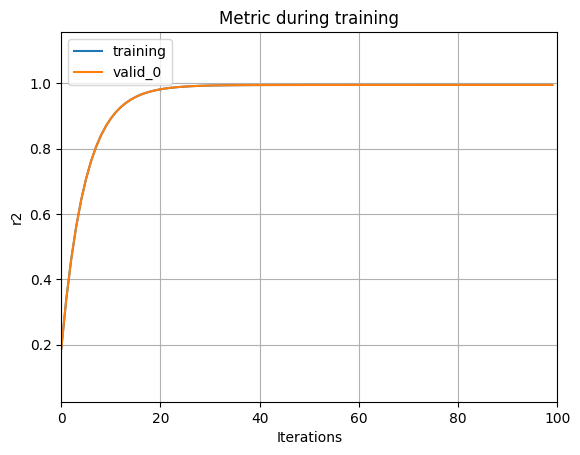

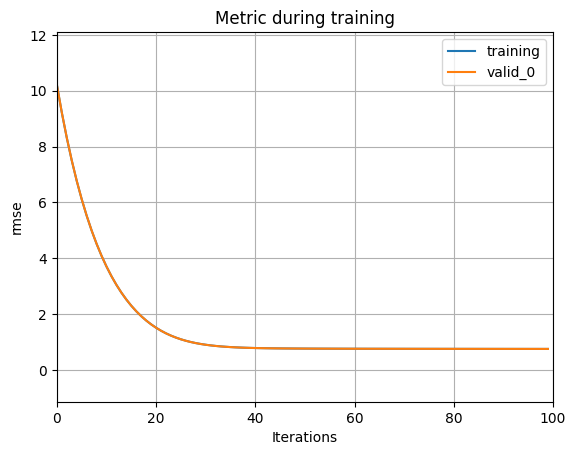

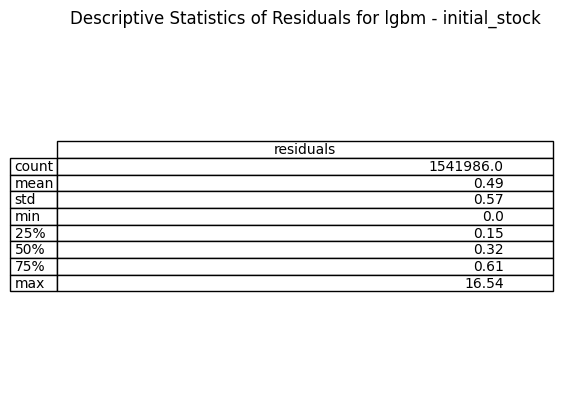

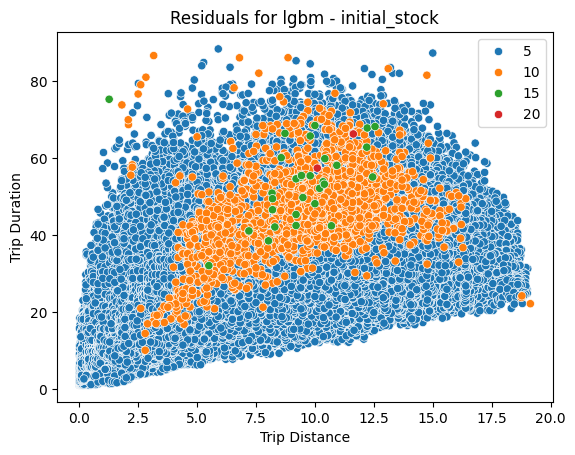

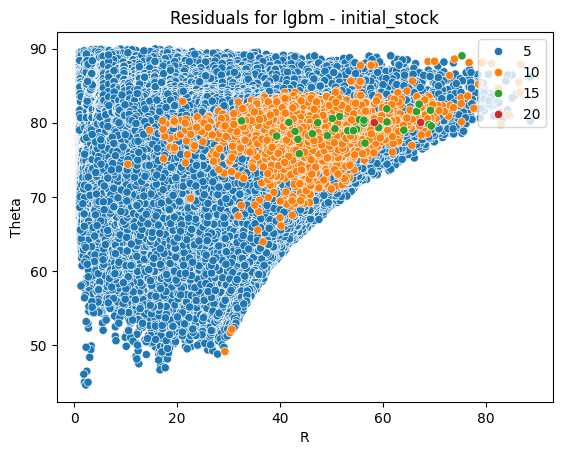

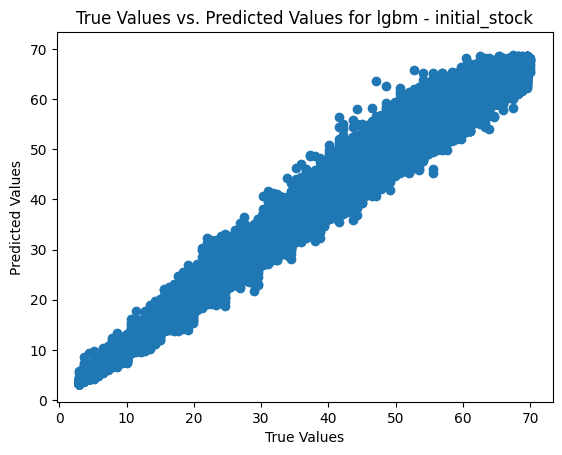

In [118]:
show_artifacts(run_ids[1], client)

### CatBoost Artifacts

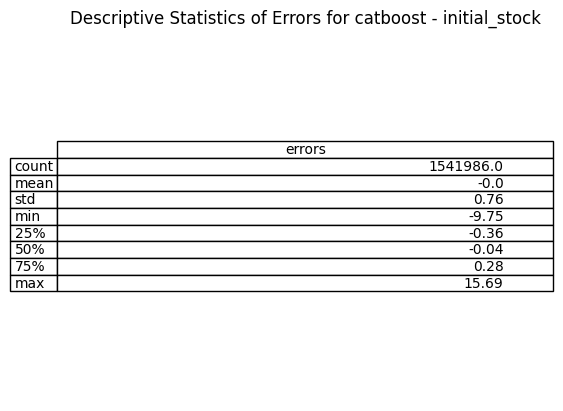

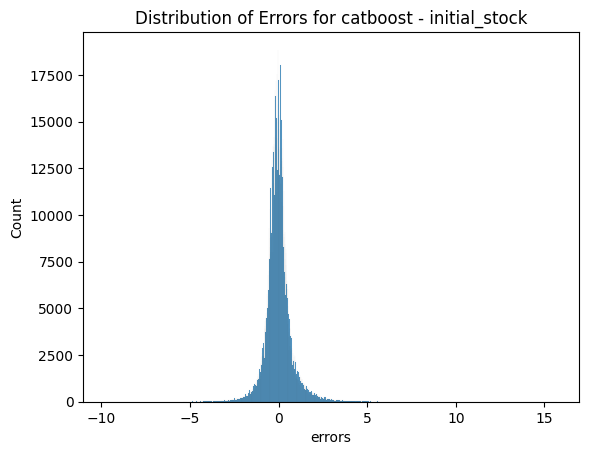

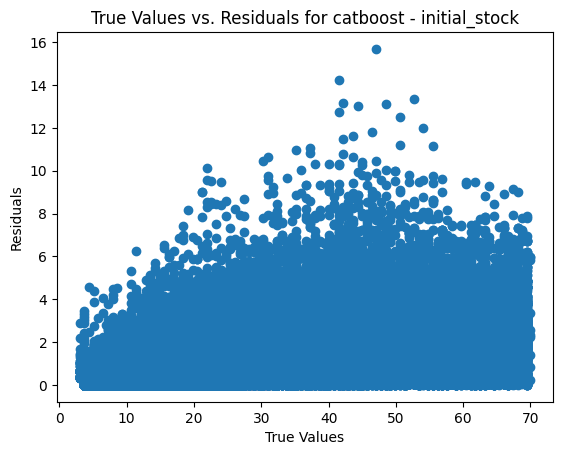

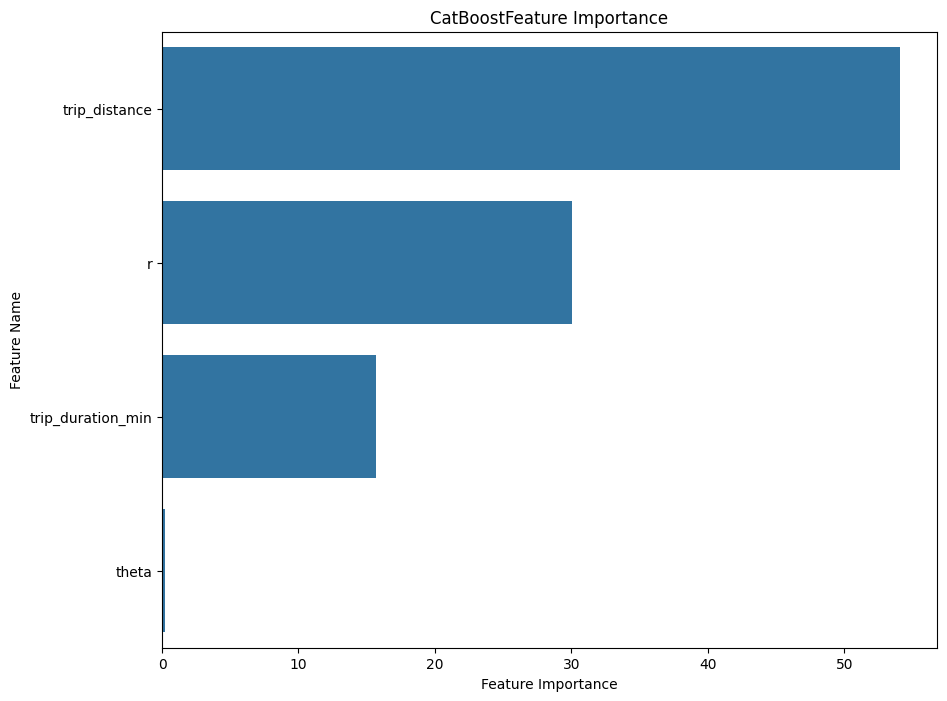

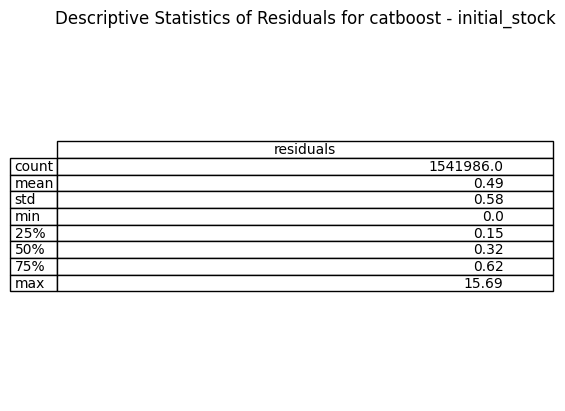

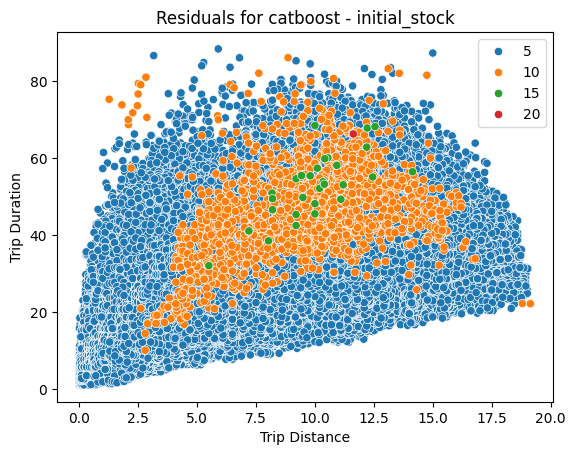

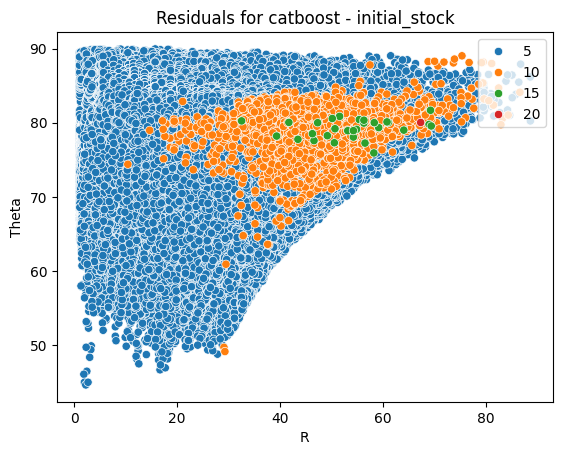

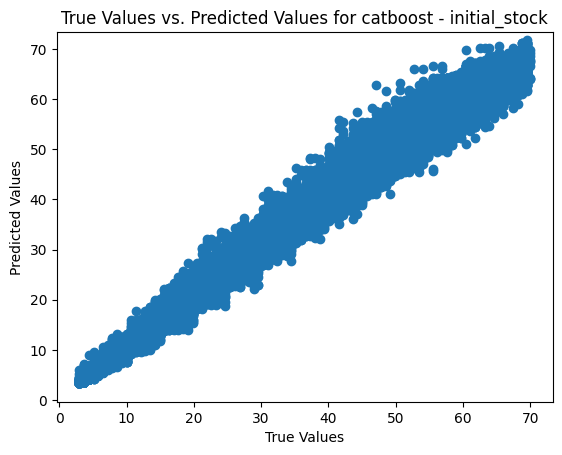

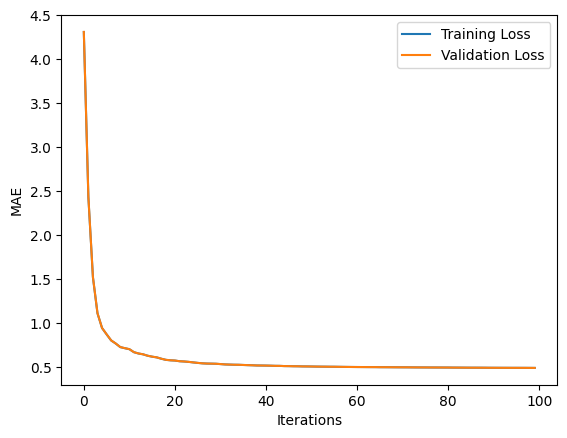

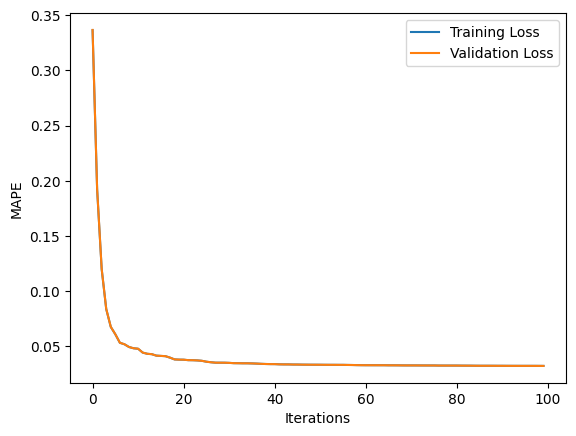

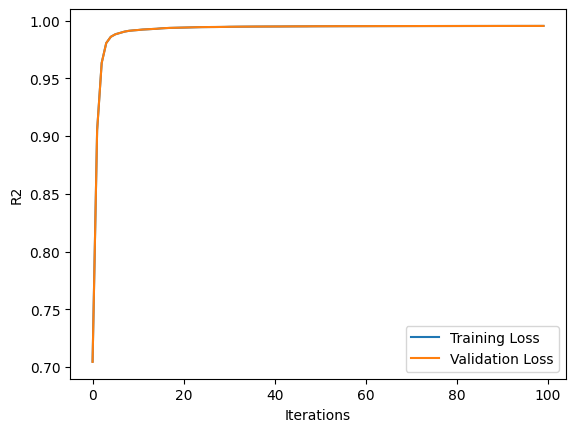

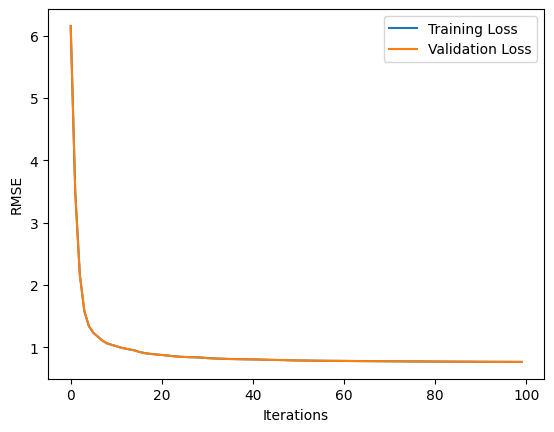

In [119]:
show_artifacts(run_ids[2], client)

### Linear Regression Artifacts

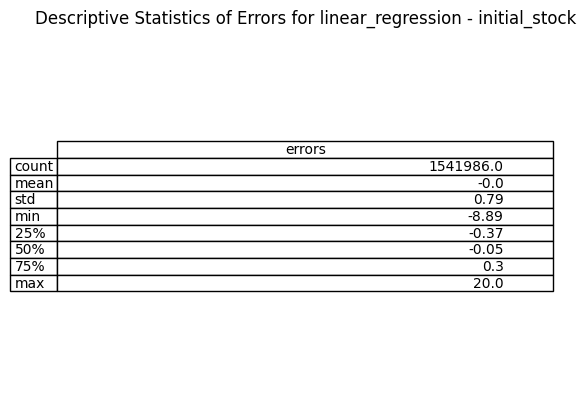

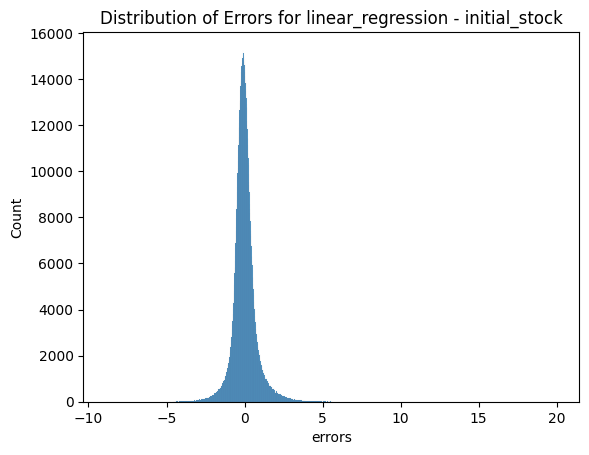

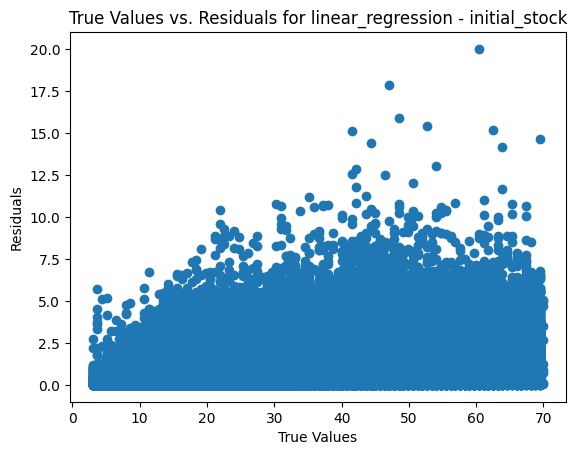

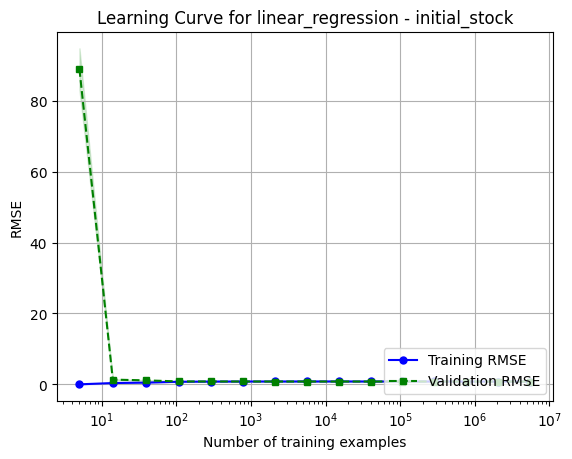

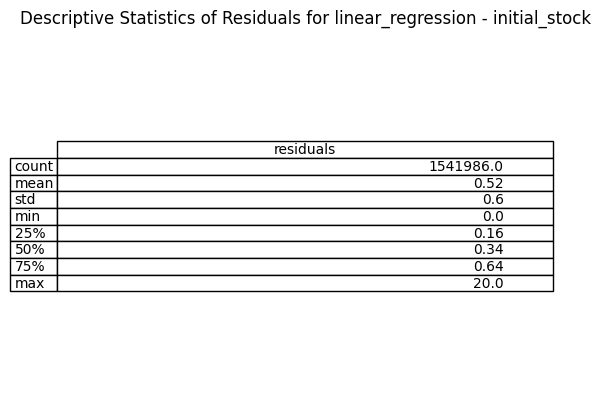

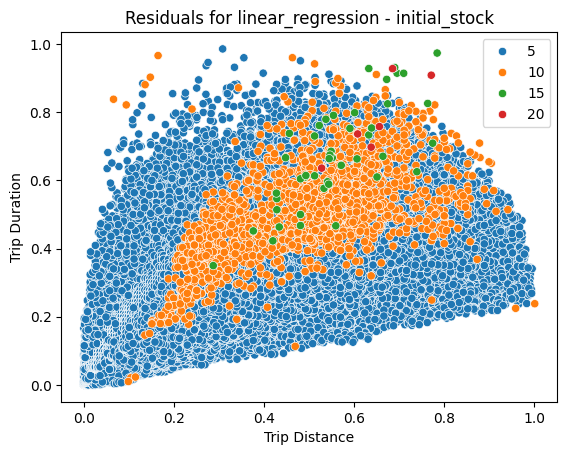

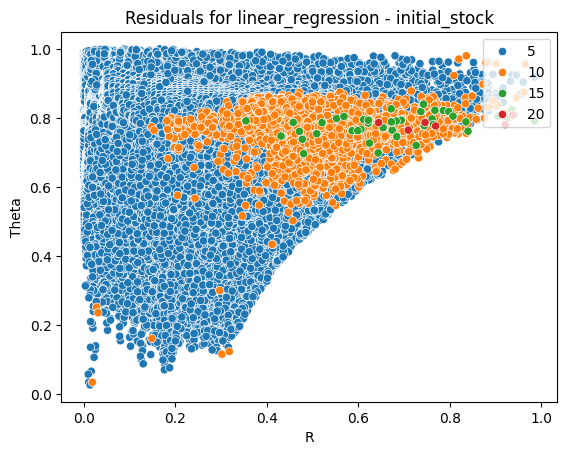

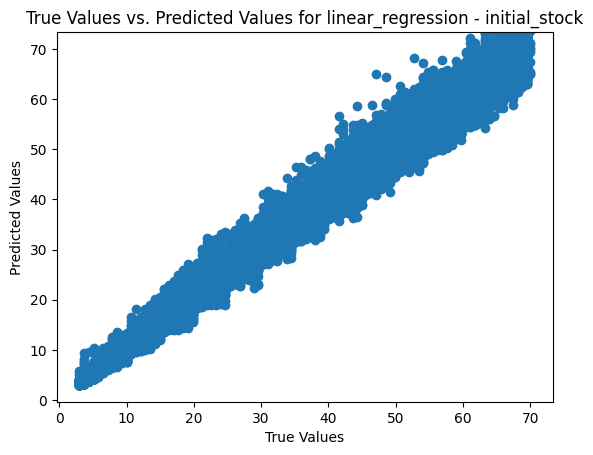

In [120]:
show_artifacts(run_ids[3], client)

### Ridge Artifacts

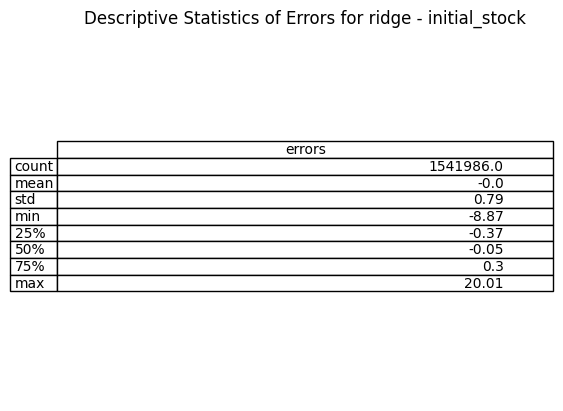

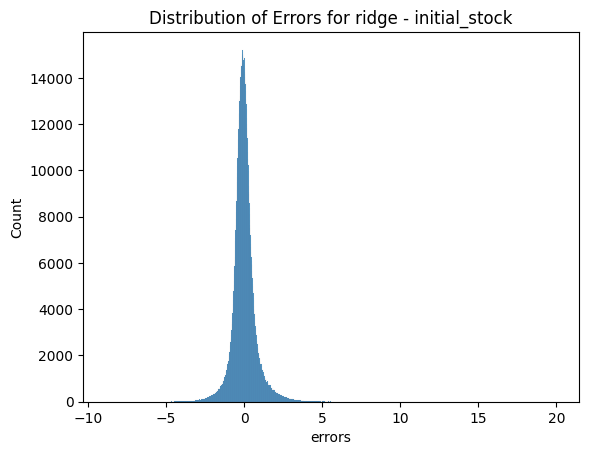

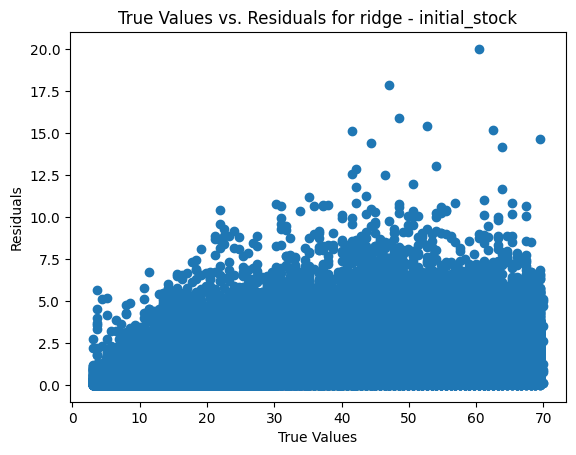

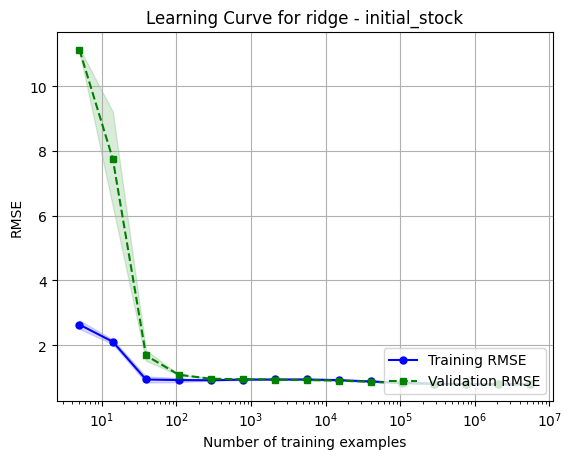

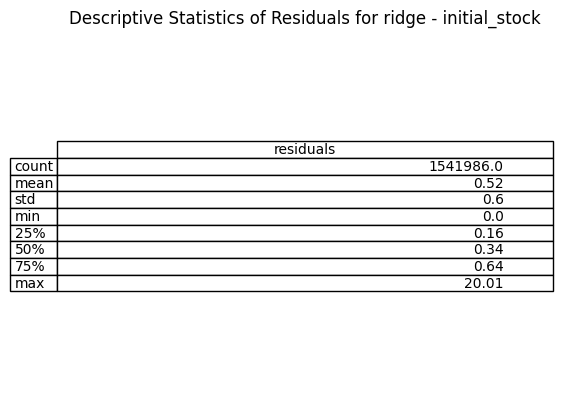

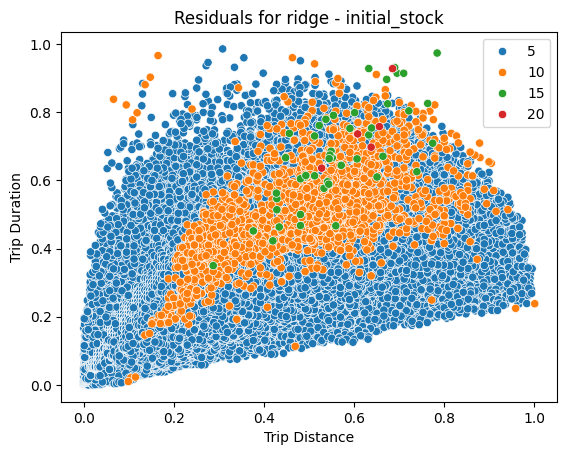

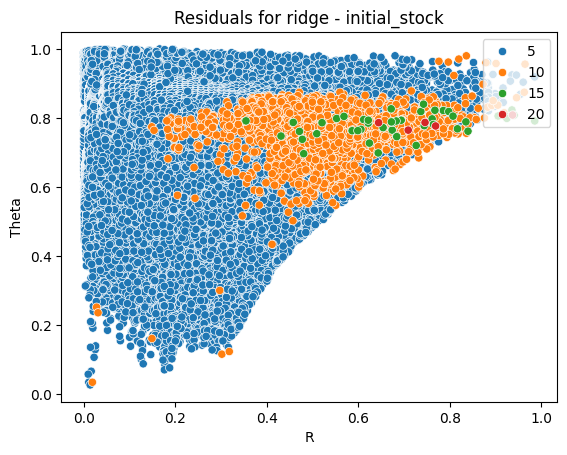

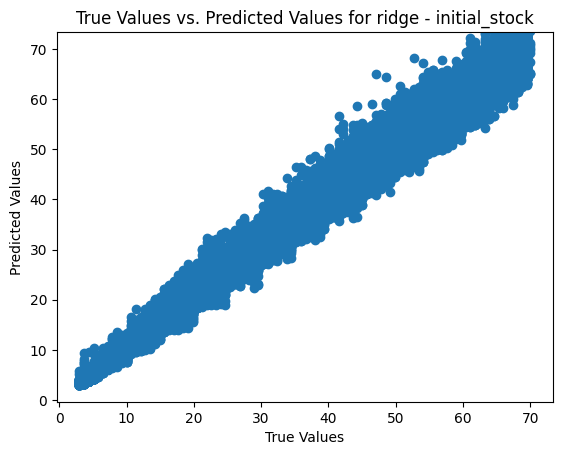

In [121]:
show_artifacts(run_ids[4], client)

### Linear SVR Artifacts

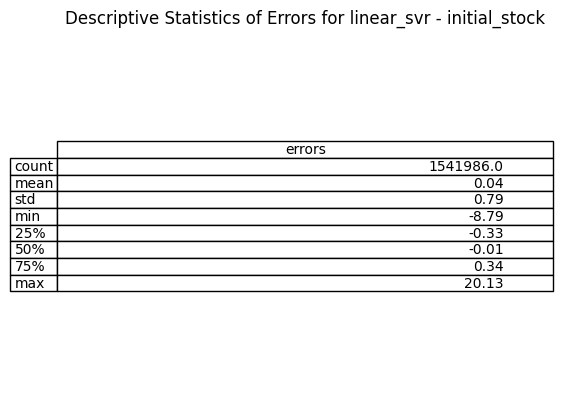

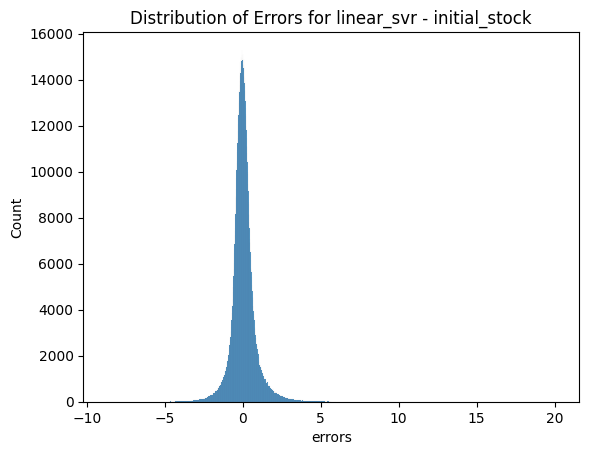

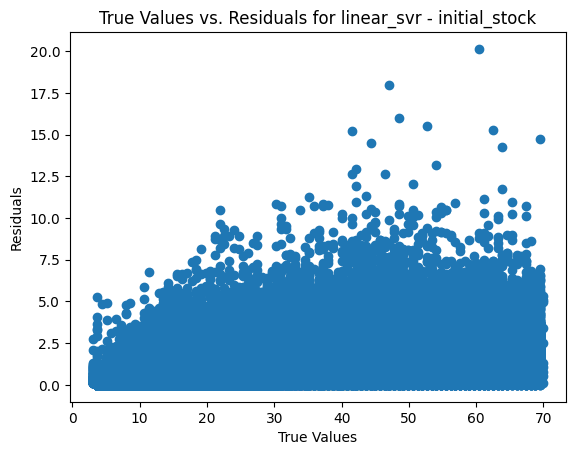

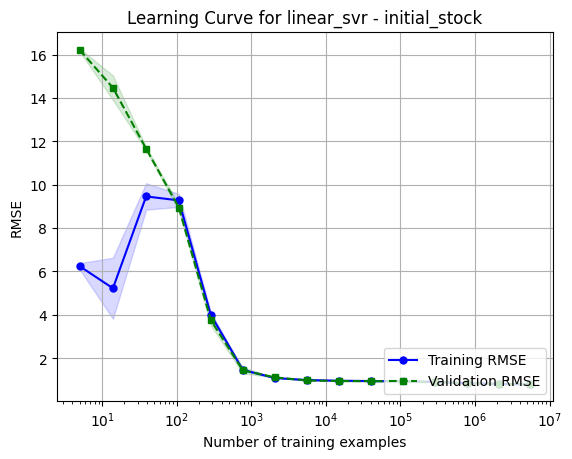

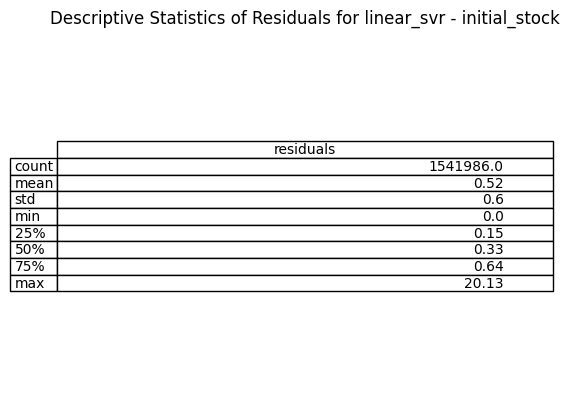

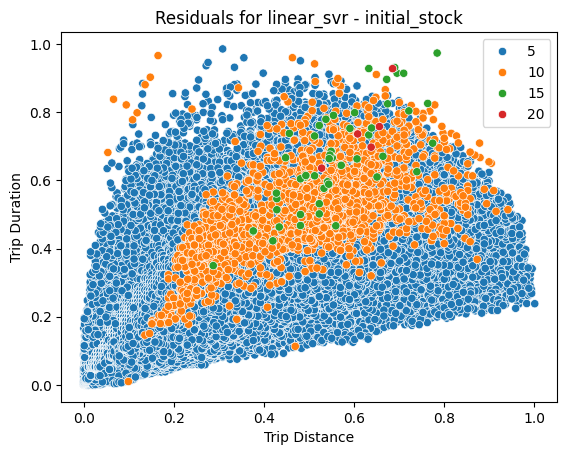

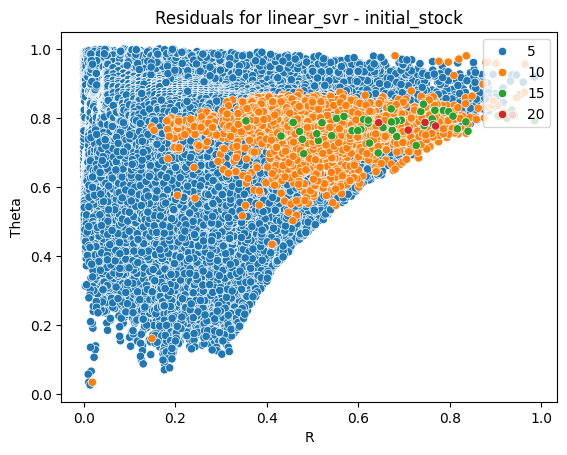

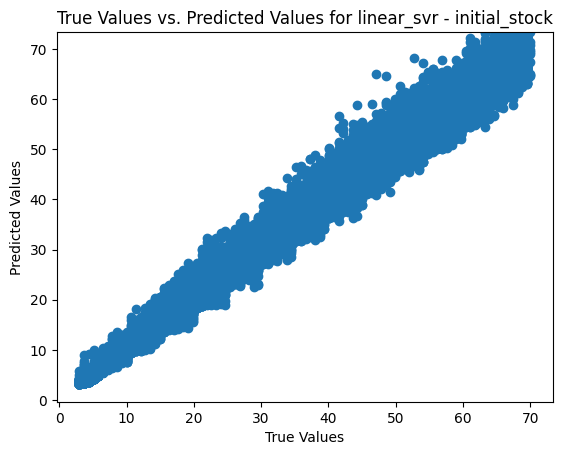

In [122]:
show_artifacts(run_ids[5], client)

### Huber Artifacts

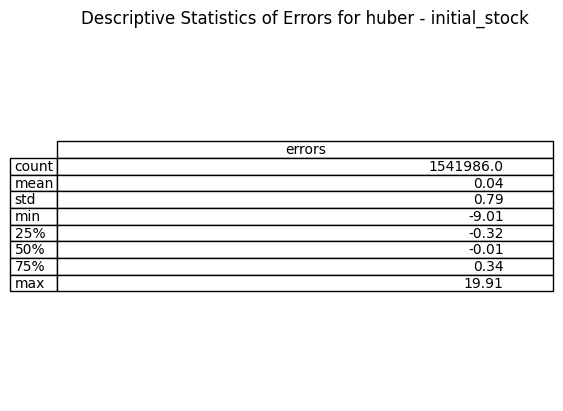

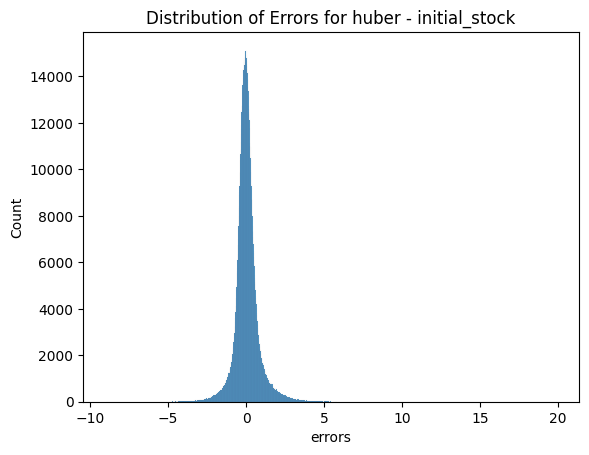

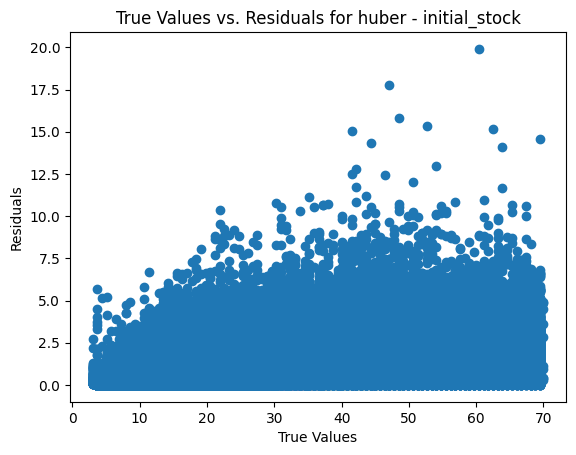

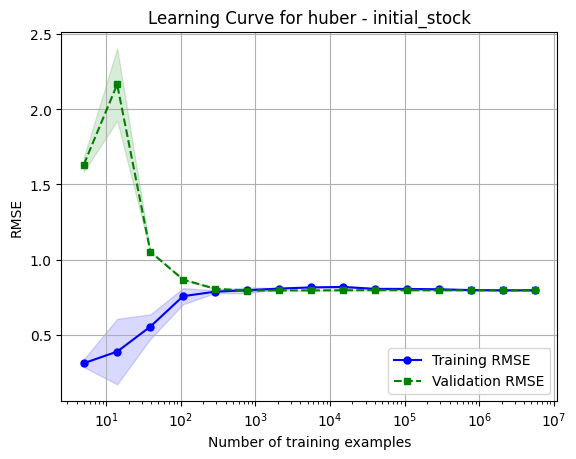

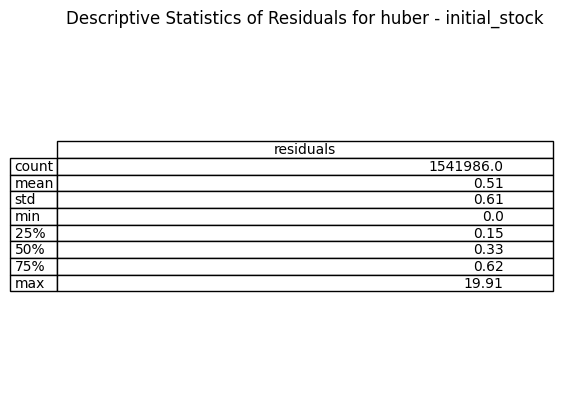

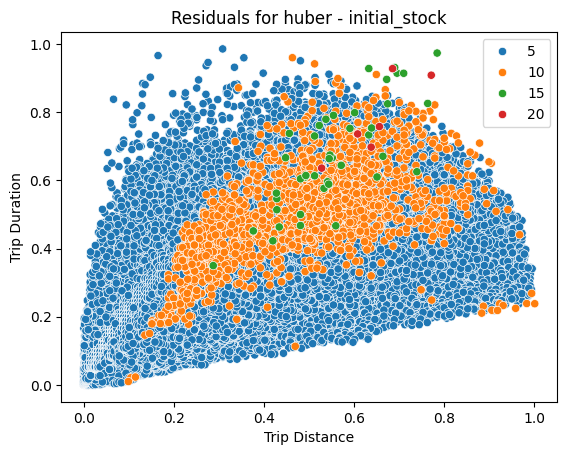

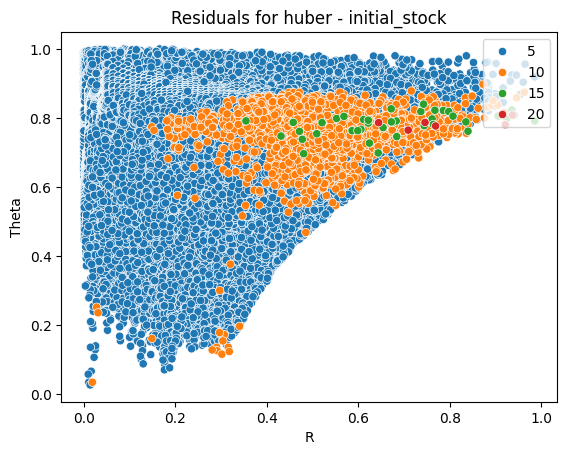

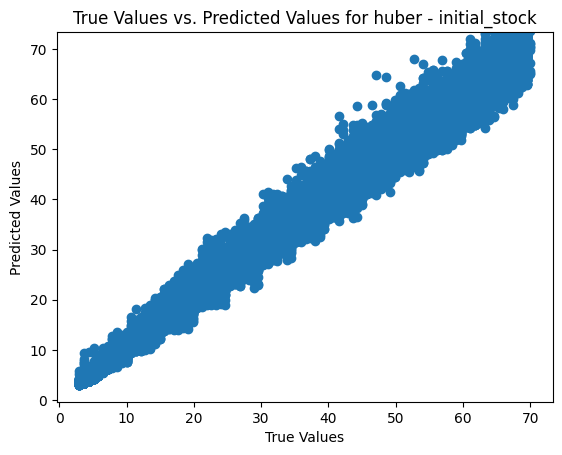

In [123]:
show_artifacts(run_ids[6], client)

### XGBoost Artifacts

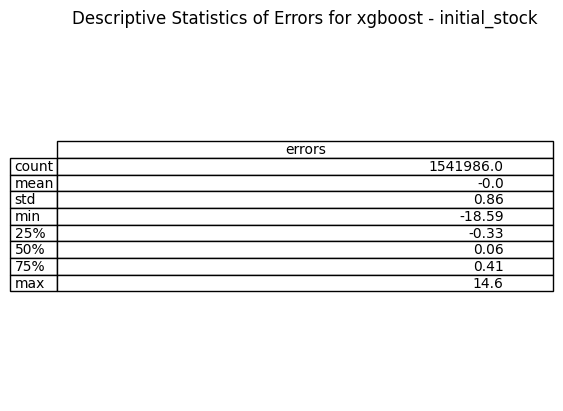

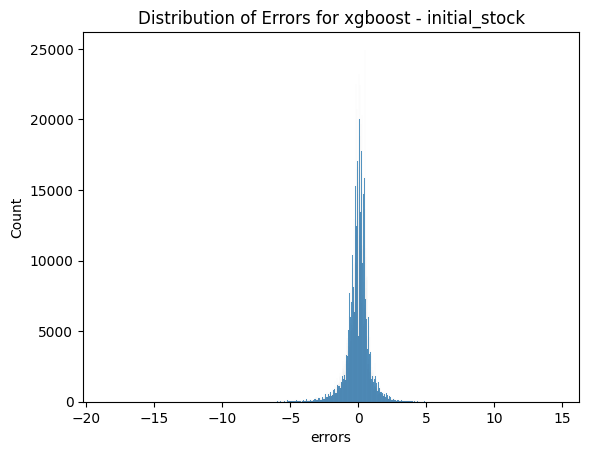

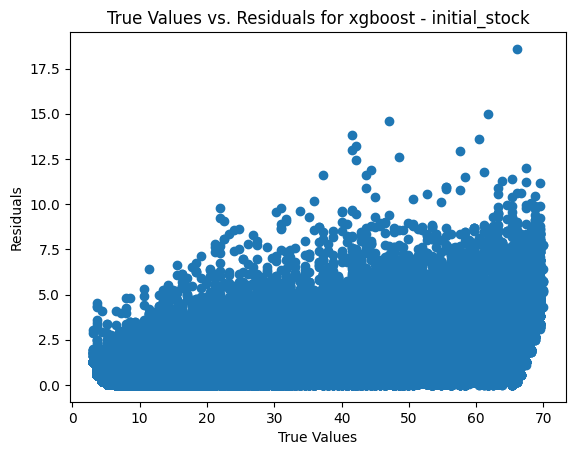

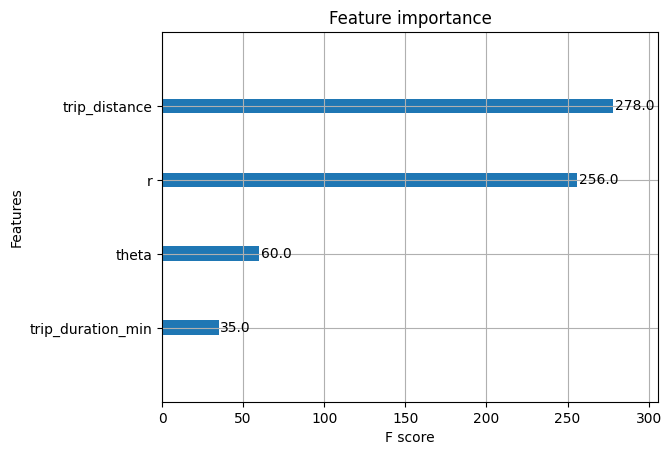

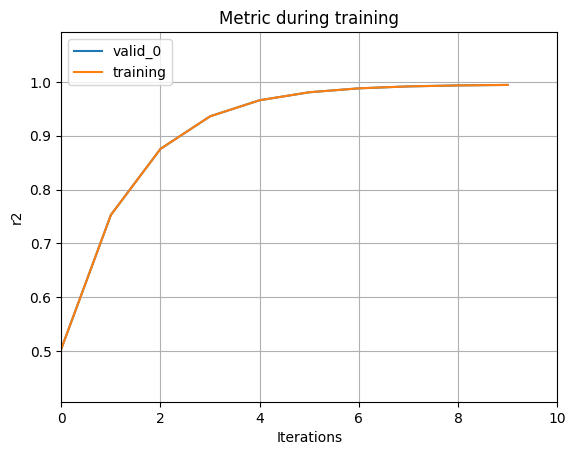

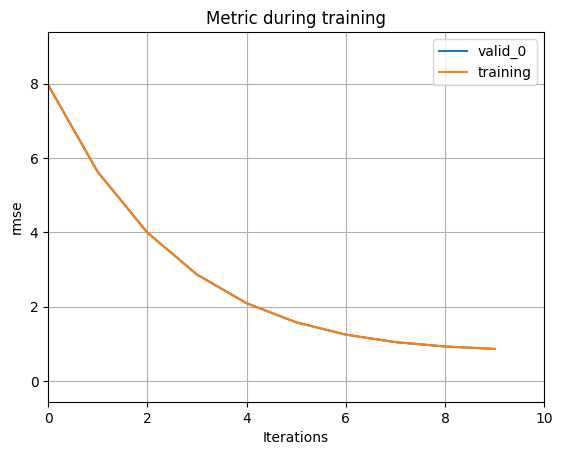

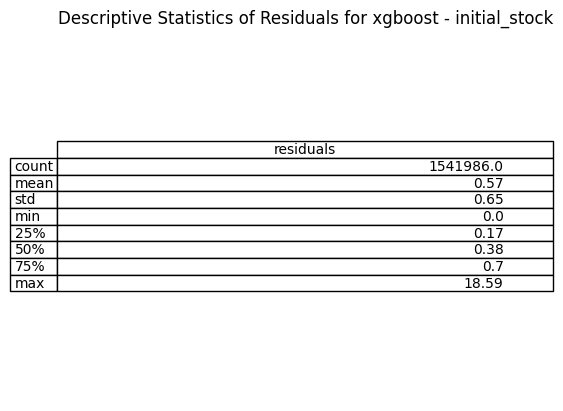

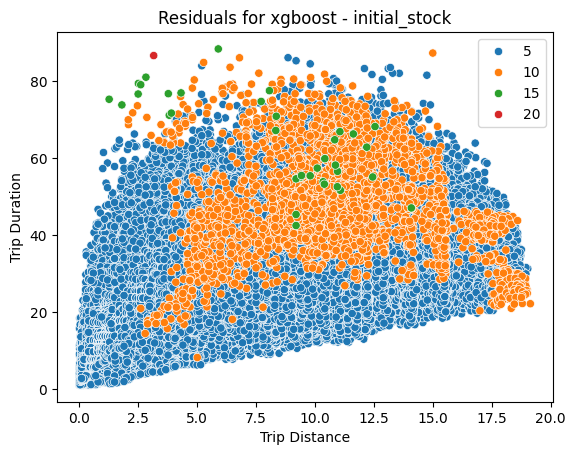

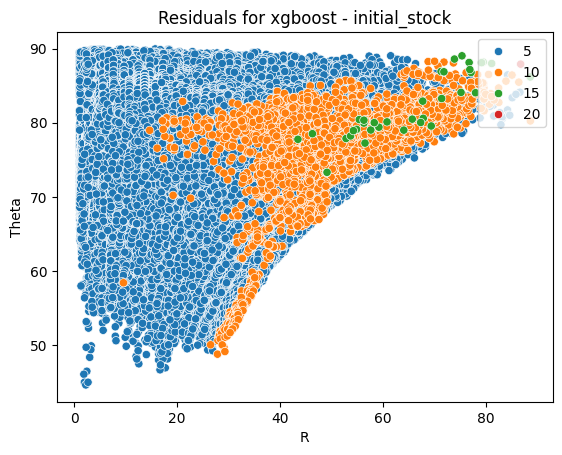

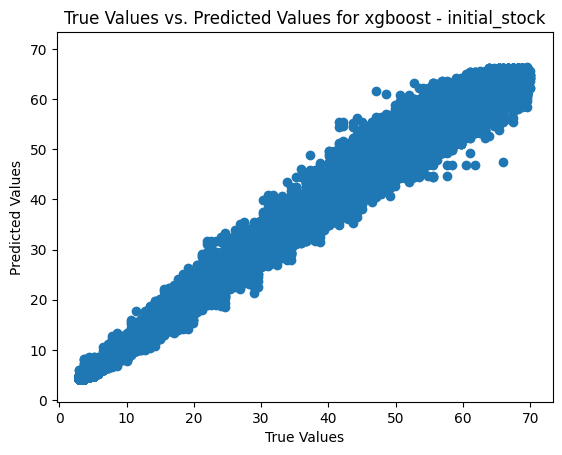

In [124]:
show_artifacts(run_ids[7], client)

## Discussion

The results for all runs shows that models performed best with using trip distance, trip duration, R, and $\theta$.
Elastic Net, SKlearn's Random Forest, LGBM's Random Forest, and LGBM's DART models performed above the $1.00 RMSE threshold.
The Artifacts section contains plots and descriptive statistics of the residuals for the models to provide some additional insight on model performances.

The best models are:
1. MLP
2. LightGBM
3. CatBoost
4. Linear Regression
5. Ridge Regression
6. Linear SVR
7. Huber Regression


From these models, CatBoost struggled with CV scores which is concerning.

A short list of models that are promising are:
* MLP
* LightGBM
* Linear Regression
* Linear SVR

The next step is to perform hyper paraemter optimization (excluding Linear Regression) and then evaluate model performances.
Also, an ensemble model will be created to compare against individual models, with the best model being selected.